In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
results_df = pd.read_csv('../data/States_clean_df.csv')

In [4]:
results_df.head(2)

,State,District,FirstLastP,Party,Raised,Spent,Difference,Outcome,Winner,CRPICO
0,Alabama,1,Jerry Carl (R),R,1971321.50,1859348.91,111972.59,W,1,O
1,Alabama,1,James Averhart (D),D,80094.95,78973.24,1121.71,L,0,O


In [5]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       851 non-null    object 
 1   District    851 non-null    int64  
 2   FirstLastP  851 non-null    object 
 3   Party       851 non-null    object 
 4   Raised      851 non-null    float64
 5   Spent       851 non-null    float64
 6   Difference  851 non-null    float64
 7   Outcome     851 non-null    object 
 8   Winner      851 non-null    int64  
 9   CRPICO      851 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 66.6+ KB


- how often does the candidate who raised the most money win? 
- group by state and district -- added new column so only need to group by the one column
- do you put in a flag to say this person raised the most, already have the win in the results column 
- then see out of x districts and states how many of them (so count total races) and then count how many people won and divide that by the total seats


In [6]:
# how many unique districts and states there are 
# making new column in df to combine district and state
results_df['st_dist'] = results_df['State'] + results_df['District'].astype(str)
total_seats = results_df['st_dist'].nunique()
total_seats


435

In [7]:
# flagging row for who raised the most for each state district, function created below to do this, this was code to see group by working
results_df.groupby('st_dist')['Raised'].max()


st_dist
Alabama1      1971321.50
Alabama2       650806.75
Alabama3      1193111.43
Alabama4      1255076.11
Alabama5       655364.80
                 ...    
Wisconsin5    1155720.78
Wisconsin6    1815756.42
Wisconsin7    2637459.08
Wisconsin8    3202904.74
Wyoming1      3003883.34
Name: Raised, Length: 435, dtype: float64

In [8]:
# function to determine who raised the most in the group 
def max_cont_dist(df, dist, raised):
    highest_raised = df.groupby(dist)[raised].transform('max')
    return (df[raised] == highest_raised).astype(int)

# adding column to flag the row that raised the most per group
results_df['max_raised'] = max_cont_dist(results_df, 'st_dist', 'Raised')

In [9]:
# counting how many groups where the person that won raised the most money
winners = results_df.groupby('st_dist')[['Outcome', 'max_raised']].apply(lambda x: (x['Outcome'] == 'W') & (x['max_raised'] == 1)).sum()
winners

384

In [10]:
# percentage of times where the most money raised wins the race
(winners / total_seats) * 100

88.27586206896552

88.27% of the time the candidate who raised the most money won the race

adding spent to this notebook to make the graph


In [11]:
# function to determine who spent the most in the group 
def max_spent_dist(df, dist, spent):
    highest_spent = df.groupby(dist)[spent].transform('max')
    return (df[spent] == highest_spent).astype(int)

# adding column to flag the row that spent the most per group
results_df['max_spent'] = max_cont_dist(results_df, 'st_dist', 'Spent')

In [12]:
# counting how many groups where the person that won spent the most money
winnersSpent = results_df.groupby('st_dist')[['Outcome', 'max_spent']].apply(lambda x: (x['Outcome'] == 'W') & (x['max_spent'] == 1)).sum()
winners

384

In [ ]:
# percentage of times where the most money spent wins the race
(winnersSpent / total_seats) * 100

87.816091954023

87.82% of the time the candidate who raised the most money won the race

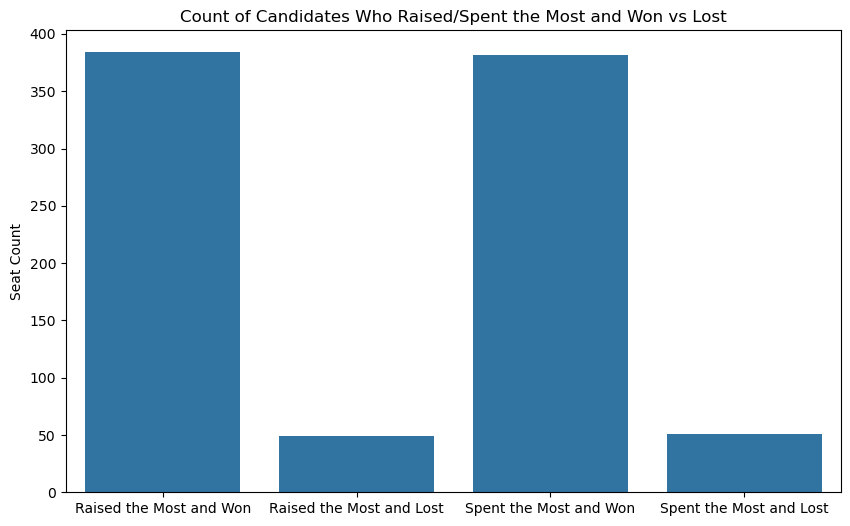

In [17]:
comparison_won_lost_df = pd.DataFrame({
    'Category': ['Raised the Most and Won', 'Raised the Most and Lost', 'Spent the Most and Won', 'Spent the Most and Lost'],
    'Count': [
        results_df[(results_df['max_raised'] == 1) & (results_df['Outcome'] == 'W')].shape[0],
        results_df[(results_df['max_raised'] == 1) & (results_df['Outcome'] == 'L')].shape[0],
        results_df[(results_df['max_spent'] == 1) & (results_df['Outcome'] == 'W')].shape[0],
        results_df[(results_df['max_spent'] == 1) & (results_df['Outcome'] == 'L')].shape[0]
    ]
})


plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=comparison_won_lost_df)
plt.title('Count of Candidates Who Raised/Spent the Most and Won vs Lost')
plt.ylabel('Seat Count')
plt.xlabel('')
plt.savefig('../images/RasisedSpentWins' , dpi= 150)
plt.show()